creating /tmp/weave-manoj_raga-EZYw_1/python27_intermediate/compiler_fb60c5945ce785d0cb2ef0303dac5249


<Figure size 432x288 with 0 Axes>

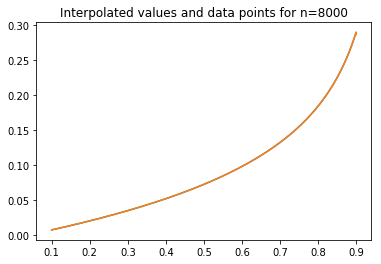

[0.002888   0.00368029 0.00469061 0.00597706 0.00761671 0.00970658
 0.01237379 0.01576938 0.0201066  0.02561299 0.03267817 0.04162913
 0.05311506 0.06776002 0.08654521 0.11057097 0.14092375 0.18057983
 0.23117527 0.29267474]


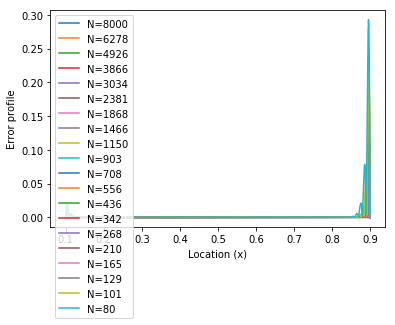

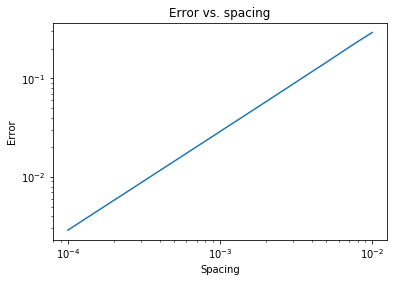

In [2]:
from scipy import *
from scipy import special
from matplotlib.pyplot import *
import weave
from numpy import *

def func(x):
	num=pow(x,1+special.jn(0,x))
	densqr=(1+100*x*x)*(1-x)
	den=sqrt(densqr)
	return num/den

#define support code
with open("spline.c","r") as f:
	scode=f.read()
	
h=logspace(-4,-2,20)
N=(0.8)/h
err=zeros(h.shape)
figure(0)
for i in range(len(h)):
	x=linspace(0.1,0.9,int(N[i]))
	y=func(x)
	n=int(N[i])
	xx=linspace(0.1,0.9,10*n+1)
	y2=zeros(x.size)
	#y2=cos(x)
	u=zeros(x.size)
	yy=zeros(xx.size)
	code="""
	#include <math.h>
	int i;
	double xp;
	spline(x,y,n,11.7288,171.855,y2,u);
	for(i=0; i<=10*n; i++){
		xp=xx[i];
		splint(x,y,y2,n,xp,yy+i);
	}
	"""
	weave.inline(code,["x","y","n","y2","u","xx","yy"],support_code=scode,extra_compile_args=["-g"],compiler="gcc")
	if i==0:
		figure(2)
		plot(x,y)
		plot(xx,yy)
		title("Interpolated values and data points for n=%d" % N[i])
		show()
	figure(0)
	z=abs(yy-func(xx))
	plot(xx,z,label="N=%d"%N[i])
	err[i]=z.max()
print(err)
xlabel("Location (x)")
ylabel("Error profile")
legend(loc="upper left")
show()
figure(1)
loglog(h,err)
xlabel("Spacing")
ylabel("Error")
title("Error vs. spacing")
show()